# lac, lab 04: multi-variable linear regression

## 기존의 선형회귀
1. 우리의 가설이 무엇인가?
> H(x) = Wx+b

2. cost/loss에 대한 정의
> 잔차 제곱의 평균

3. cost를 최소화 하기 위한 Gradient descent algorithm

## 멀티의 경우

1. 가설
> H(x1,x2,x3) = w1x1 + w2x2 + w3x3 + b

2. cost/loss에 대한 정의
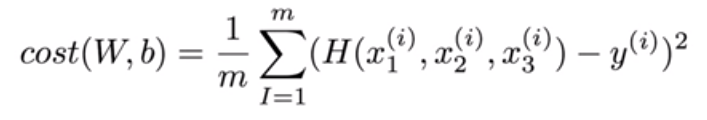

> Matrix multiplication을 이용하여 계산
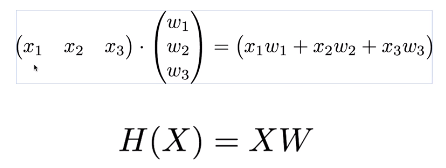

> x행렬 [x의 instance 개수, x변수 개수] -> 위의 경우 [1, 3]

> w행렬 [x변수 개수, 도출할 y값의 개수] -> 위의 경우 [3, 1]

## 코드 실습

In [1]:
import tensorflow as tf

C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:461: Futu

In [2]:
x1_data=[73, 93, 89, 96, 73]
x2_data=[80, 88, 91, 98, 66]
x3_data=[75, 93, 90, 100, 70]
y_data=[152, 185, 180, 196, 142]

#placeholder 생성
x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([1]), name='weight1')
w2=tf.Variable(tf.random_normal([1]), name='weight2')
w3=tf.Variable(tf.random_normal([1]), name='weight3')
b=tf.Variable(tf.random_normal([1]), name='bias')
hypothesis=x1*w1+x2*w2+x3*w3+b

#cost/lost function
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

#session 생성
sess=tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _=sess.run([cost, hypothesis, train],
                        feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  6128.6084 
Prediction:
 [220.75725 267.9716  262.5572  288.05768 203.16286]
10 Cost:  2.715948 
Prediction:
 [151.51715 184.75507 180.56003 198.76443 139.69113]
20 Cost:  2.6560516 
Prediction:
 [151.30511 184.50508 180.31125 198.49312 139.50201]
30 Cost:  2.652205 
Prediction:
 [151.30196 184.50612 180.30978 198.49112 139.50436]
40 Cost:  2.6484082 
Prediction:
 [151.29944 184.50792 180.30911 198.48997 139.5073 ]
50 Cost:  2.6446023 
Prediction:
 [151.29692 184.50972 180.30843 198.4888  139.51021]
60 Cost:  2.6408405 
Prediction:
 [151.2944  184.51149 180.30774 198.48764 139.5131 ]
70 Cost:  2.637096 
Prediction:
 [151.29189 184.51329 180.30705 198.4865  139.516  ]
80 Cost:  2.6333432 
Prediction:
 [151.2894  184.51506 180.30638 198.48532 139.51889]
90 Cost:  2.6296115 
Prediction:
 [151.28691 184.51683 180.3057  198.48418 139.52179]
100 Cost:  2.625906 
Prediction:
 [151.28442 184.51859 180.30501 198.48302 139.52466]
110 Cost:  2.622197 
Prediction:
 [151.28197 184.52037 180

상위 단계는 x의 instance 개수가 늘어날 수록 코드가 계속 증가하므로 사용하지 않음
Matrix를 이용한 연산 적용

In [5]:
x_data=[[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data=[[152.], [185.], [180.], [196.], [142.]]

X=tf.placeholder(tf.float32, shape=[None, 3])
Y=tf.placeholder(tf.float32, shape=[None, 1])

W=tf.Variable(tf.random_normal([3, 1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis=tf.matmul(X, W)+b
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _=sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  60288.883 
Prediction:
 [[-68.16109 ]
 [-75.6475  ]
 [-77.52062 ]
 [-88.02277 ]
 [-53.065624]]
10 Cost:  8.1370535 
Prediction:
 [[149.04056]
 [185.39667]
 [179.69891]
 [192.0827 ]
 [146.0415 ]]
20 Cost:  7.5567183 
Prediction:
 [[149.70612]
 [186.18066]
 [180.47963]
 [192.93271]
 [146.63567]]
30 Cost:  7.528351 
Prediction:
 [[149.7165 ]
 [186.17726]
 [180.4845 ]
 [192.93784]
 [146.62924]]
40 Cost:  7.50022 
Prediction:
 [[149.72487]
 [186.17146]
 [180.48695]
 [192.94032]
 [146.62102]]
50 Cost:  7.472104 
Prediction:
 [[149.73322]
 [186.16566]
 [180.48943]
 [192.94287]
 [146.6128 ]]
60 Cost:  7.444223 
Prediction:
 [[149.74152]
 [186.15988]
 [180.49185]
 [192.94534]
 [146.60458]]
70 Cost:  7.416453 
Prediction:
 [[149.7498 ]
 [186.1541 ]
 [180.49431]
 [192.94785]
 [146.5964 ]]
80 Cost:  7.3888307 
Prediction:
 [[149.75807]
 [186.14836]
 [180.49673]
 [192.95033]
 [146.58824]]
90 Cost:  7.3613563 
Prediction:
 [[149.76634]
 [186.14265]
 [180.49919]
 [192.95287]
 [146.58014]]
10

파일 불러오기 실습

In [22]:
import numpy as np
test_score = np.loadtxt(r'C:\Users\seoyeong\Desktop\DAwP\term_3\data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [23]:
test_score

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.]], dtype=float32)

In [24]:
x_data = test_score[:, 0:-1]
y_data = test_score[:, [-1]]

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

(6, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]] 6
(6, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]]


In [27]:
tf.set_random_seed(777)

X=tf.placeholder(tf.float32, shape=[None, 3])
Y=tf.placeholder(tf.float32, shape=[None, 1])

W=tf.Variable(tf.random_normal([3, 1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis=tf.matmul(X, W)+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _=sess.run([cost, hypothesis, train],
                        feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

#Ask my score
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print("Other scores will be ", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

0 Cost:  13387.538 
Prediction:
 [[39.713856]
 [55.656437]
 [50.94809 ]
 [53.514416]
 [45.976547]
 [31.644024]]
10 Cost:  8.94781 
Prediction:
 [[147.56183 ]
 [185.2964  ]
 [178.67657 ]
 [192.61198 ]
 [144.8592  ]
 [104.535034]]
20 Cost:  8.284091 
Prediction:
 [[148.30544]
 [186.16783]
 [179.54689]
 [193.55785]
 [145.5199 ]
 [105.01644]]
30 Cost:  8.234216 
Prediction:
 [[148.32367]
 [186.16719]
 [179.55803]
 [193.56808]
 [145.5154 ]
 [105.00749]]
40 Cost:  8.184742 
Prediction:
 [[148.33693 ]
 [186.16069 ]
 [179.56337 ]
 [193.57195 ]
 [145.50642 ]
 [104.995255]]
50 Cost:  8.135564 
Prediction:
 [[148.35011]
 [186.15416]
 [179.56862]
 [193.57578]
 [145.49744]
 [104.98304]]
60 Cost:  8.086773 
Prediction:
 [[148.36325]
 [186.14764]
 [179.57385]
 [193.57956]
 [145.4885 ]
 [104.97088]]
70 Cost:  8.0382595 
Prediction:
 [[148.37636]
 [186.14117]
 [179.5791 ]
 [193.58336]
 [145.47958]
 [104.95875]]
80 Cost:  7.990055 
Prediction:
 [[148.38942]
 [186.13469]
 [179.58429]
 [193.58714]
 [145.4

## Queue Runners
파일이 클 경우 메모리에 한 번에 올리기 힘들다면, tensorflow의 queue runners 이용
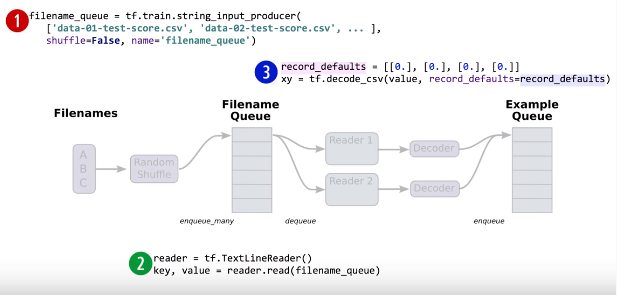

1. file list 정리, 셔플 여부, queue의 이름
2. file을 읽어올 Reader를 정의
3. value 값을 어떻게 파싱을 할 것인가 -> decode_csv
4. batch를 형성하여 결과를 불러옴 -> example queue의 각각의 칸

In [36]:
import tensorflow as tf
# queue 만들기 (file list 정리)
filename_queue=tf.train.string_input_producer(['data-01-test-score.csv'], shuffle=False, name='filename_queue')

# reader 정의
reader=tf.TextLineReader()
key, value=reader.read(filename_queue)

# 각각 field의 데이터 타입 정의해서 넘겨줌
record_defaults=[[0.],[0.],[0.],[0.]]
# 우리가 관심있는 value를 csv로 decode 하자
xy=tf.decode_csv(value, record_defaults=record_defaults)

# 읽어온 xy를 batch를 이용하여 데이터를 읽게 됨
# train_x_batch, train_y_batch -> 각각의 노드 정의
# xy[0:-1] -> x가 무엇인지 / xy[-1:] -> y가 무엇인지 정의
# batch_size를 통해 1회 pump시 몇개의 batch를 가져올 것인지 명시
train_x_batch, train_y_batch=\
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholder 생성
X=tf.placeholder(tf.float32, shape=[None, 3])
Y=tf.placeholder(tf.float32, shape=[None, 1])

W=tf.Variable(tf.random_normal([3, 1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis=tf.matmul(X, W)+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

coord=tf.train.Coordinator()
threads=tf.train.start_queue_runners(sess=sess, coord=coord)

# batch를 가져와서 training
for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _=sess.run([cost, hypothesis, train],
                                feed_dict={X: x_batch, Y: y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
        
coord.request_stop()
coord.join(threads)

0 Cost:  36436.24 
Prediction:
 [[-21.88429 ]
 [-21.244797]
 [-23.5821  ]
 [-26.691349]
 [-13.835151]
 [-10.616591]
 [-21.88429 ]
 [-21.244797]
 [-23.5821  ]
 [-26.691349]]
10 Cost:  6.114999 
Prediction:
 [[142.61308 ]
 [104.708916]
 [148.74431 ]
 [183.86508 ]
 [178.50163 ]
 [193.37971 ]
 [142.61308 ]
 [104.708916]
 [148.74431 ]
 [183.86508 ]]
20 Cost:  5.1572585 
Prediction:
 [[179.65312]
 [194.63188]
 [143.4956 ]
 [105.35478]
 [149.72275]
 [185.02533]
 [179.65312]
 [194.63188]
 [143.4956 ]
 [105.35478]]
30 Cost:  3.6002948 
Prediction:
 [[149.66655 ]
 [184.94185 ]
 [179.57924 ]
 [194.5496  ]
 [143.42943 ]
 [105.301346]
 [149.66655 ]
 [184.94185 ]
 [179.57924 ]
 [194.5496  ]]
40 Cost:  5.4807763 
Prediction:
 [[143.59258]
 [105.41708]
 [149.86003]
 [185.15892]
 [179.80125]
 [194.78964]
 [143.59258]
 [105.41708]
 [149.86003]
 [185.15892]]
50 Cost:  5.0846834 
Prediction:
 [[179.67395]
 [194.6492 ]
 [143.485  ]
 [105.33307]
 [149.75879]
 [185.02116]
 [179.67395]
 [194.6492 ]
 [143.485 